In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy import stats
import matplotlib.gridspec as gridspec
import asym_funcs as af
import importlib
importlib.reload(af)

<module 'asym_funcs' from '/glade/u/home/lettier/analysis/analysis_antarctic-asym/analysis/asym_funcs.py'>

In [3]:
wdir = './processed/'

In [4]:
sy = 1979
ey = 1998

Read in observations

In [5]:
# open data 
siads = xr.open_dataset(wdir+'sia_sie_daily_CDRv4_1979-2018.nc').rename({'time':'day'})

In [6]:
asym_y, _, _ = af.asym_xr(siads,'day')

myds = siads.sel(year=slice(sy,ey)).mean(dim='year')

aday, dmin, dmax = af.asym_xr(myds,dim='day')
print('Antarctic summer minimum at the {0}th day of year'.format(1+dmin.sie_sh_cdr.values)) # day index starts at 0 here, so add 1
print('Antarctic winter maximum at the {0}th day of year'.format(1+dmax.sie_sh_cdr.values)) 

retreat = dmax.sie_sh_cdr.values-dmin.sie_sh_cdr.values
growth = 365. - retreat
diff = growth-retreat

print('Retreat period is {0} days shorter than the growth period'.format(abs(diff)))
print('Retreat over {0} days and growth over {1} days'.format(retreat,growth))

myds = af.switch_sh(myds)

Antarctic summer minimum at the 55.0th day of year
Antarctic winter maximum at the 263.0th day of year
Retreat period is 51.0 days shorter than the growth period
Retreat over 208.0 days and growth over 157.0 days


Read in CMIP6 data

In [8]:
cmip6ds = xr.open_dataset(wdir+'sia_sie_daily_CMIP6_1979-1998clim.nc').rename({'time':'day'})
cmip6ds  = cmip6ds .where(cmip6ds >.1,0.) # ice less than 0.1 million km^2 counts as no ice
asym_cmip6, _,_ = af.asym_xr(cmip6ds ,'day')

Read in CMIP5 data

In [9]:
cmip5ds = xr.open_dataset(wdir+'sia_sie_daily_CMIP5_1980-1998clim.nc').rename({'time':'day'})
cmi5ds  = cmip5ds .where(cmip5ds >.1,0.) # ice less than 0.1 million km^2 counts as no ice
asym_cmip5, _,_ = af.asym_xr(cmip5ds ,'day')

Make figure 1

Mean of raw data is 11.7630
Mean of harmonic is 11.7630


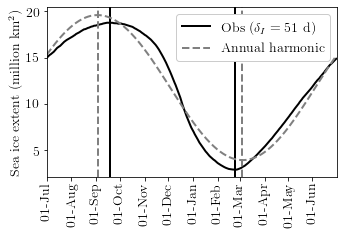

In [33]:
fig = plt.figure(figsize=(5,3.5))
var = 'sie_sh'
ax = plt.subplot(1,1,1)
myds = siads.sel(year=slice(sy,ey)).mean(dim='year')
myds = af.switch_sh(myds)
aday, dmin, dmax = af.asym_xr(myds,dim='day')

myds[var+'_cdr'].plot(ax=ax,linestyle='-',c='k',label='Obs ($\delta_I = {0}$ d'.format(aday.sie_sh_cdr.values.astype(int))+')',linewidth=2)
ax.axvline(x=dmin[var+'_cdr'],linestyle='-',c='k',alpha=1.,linewidth=2)
ax.axvline(x=dmax[var+'_cdr'],linestyle='-',c='k',alpha=1.,linewidth=2)

print('Mean of raw data is {:.4f}'.format(myds[var+'_cdr'].mean().values))
harm = af.get_annual_harmonic (myds.day.values/len(myds.day),myds[var+'_cdr'].values)
print('Mean of harmonic is {:.4f}'.format(np.real(harm.mean())))


ax.plot(myds.day.values, harm,linewidth=2,alpha=1.,linestyle='--',c='grey',label='Annual harmonic')
ax.axvline(x=myds.day[np.argmin(harm)],linestyle='--',c='grey',alpha=1.,linewidth=2)
ax.axvline(x=myds.day[np.argmax(harm)],linestyle='--',c='grey',alpha=1.,linewidth=2)

ax.set_ylabel('Sea ice extent (million km$^2$)')
ax.set_xticks(af.shfirstofmonthind )
ax.set_xticklabels(af.shfirstofmonthlabel,rotation='vertical')
ax.set_xlabel('')
ax.set_xlim([1,366])
plt.legend(facecolor='white', framealpha=1)

plt.tight_layout()
plt.show()
fig.savefig('figs/sie_obs_harm.pdf',bbox_inches='tight',dpi=300)
plt.close()

18.785247581607695
2.8876886344217993


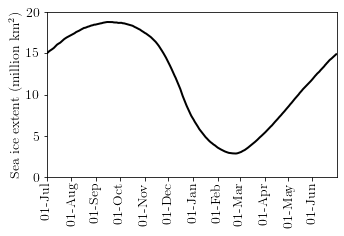

In [31]:
fig = plt.figure(figsize=(5,3.5))
var = 'sie_sh'
ax = plt.subplot(1,1,1)
myds = siads.sel(year=slice(sy,ey)).mean(dim='year')
myds = af.switch_sh(myds)

myds[var+'_cdr'].plot(ax=ax,linestyle='-',c='k',label='Obs ($\delta_I = {0}$ d'.format(aday.sie_sh_cdr.values.astype(int))+')',linewidth=2)

print(myds[var+'_cdr'].max().values)
print(myds[var+'_cdr'].min().values)

ax.set_ylabel('Sea ice extent (million km$^2$)')
ax.set_xticks(af.shfirstofmonthind )
ax.set_xticklabels(af.shfirstofmonthlabel,rotation='vertical')
ax.set_xlabel('')
ax.set_xlim([1,366])
ax.set_ylim([0,20])
plt.tight_layout()
plt.show()
fig.savefig('figs/sie_obsonly.pdf',bbox_inches='tight',dpi=300)
plt.close()

18.785247581607695
2.8876886344217993


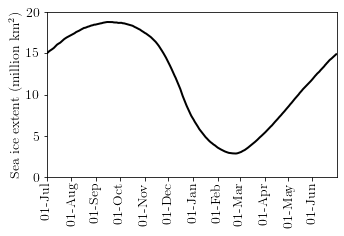

In [31]:
fig = plt.figure(figsize=(5,3.5))
var = 'sie_sh'
ax = plt.subplot(1,1,1)
myds = siads.sel(year=slice(sy,ey)).mean(dim='year')
myds = af.switch_sh(myds)

myds[var+'_cdr'].plot(ax=ax,linestyle='-',c='k',label='Obs ($\delta_I = {0}$ d'.format(aday.sie_sh_cdr.values.astype(int))+')',linewidth=2)

print(myds[var+'_cdr'].max().values)
print(myds[var+'_cdr'].min().values)

ax.set_ylabel('Sea ice extent (million km$^2$)')
ax.set_xticks(af.shfirstofmonthind )
ax.set_xticklabels(af.shfirstofmonthlabel,rotation='vertical')
ax.set_xlabel('')
ax.set_xlim([1,366])
ax.set_ylim([0,20])
plt.tight_layout()
plt.show()
fig.savefig('figs/sie_obsonly.pdf',bbox_inches='tight',dpi=300)
plt.close()

Delta in the Arctic for SIE is -25 days


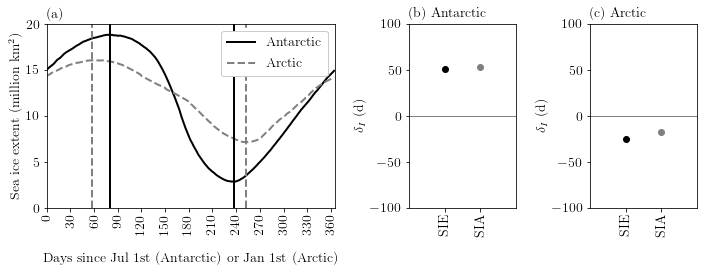

In [12]:
fig = plt.figure(figsize=(10,4))
myds = siads.sel(year=slice(sy,ey)).mean(dim='year')
myds = af.switch_sh(myds)
aday, dmin, dmax = af.asym_xr(myds,dim='day')

gs = fig.add_gridspec(1, 4)
ax = fig.add_subplot(gs[0,:2])    

myds.sie_sh_cdr.plot(ax=ax,linestyle='-',c='k',label='Antarctic',linewidth=2)
myds.sie_nh_cdr.plot(ax=ax,linestyle='--',c='grey',label='Arctic',linewidth=2)

ax.axvline(x=dmin.sie_nh_cdr,linestyle='--',c='grey',alpha=1.,linewidth=2)
ax.axvline(x=dmin.sie_sh_cdr,linestyle='-',c='k',alpha=1.,linewidth=2)
ax.axvline(x=dmax.sie_sh_cdr,linestyle='-',c='k',alpha=1.,linewidth=2)
ax.axvline(x=dmax.sie_nh_cdr,linestyle='--',c='grey',alpha=1.,linewidth=2)

ax.set_ylabel('Sea ice extent (million km$^2$)')
ax.set_xticks(np.arange(1,366,30))
ax.set_xticklabels(np.arange(0,365,30),rotation='vertical')
ax.set_xlabel('Days since Jul 1st (Antarctic) or Jan 1st (Arctic)',labelpad=15)
ax.set_xlim([1,366])
plt.legend(loc = 'upper right',facecolor='white', framealpha=1)
ax.set_title('(a)',loc='left',fontsize=14)
ax.set_ylim([0,20])


ax = fig.add_subplot(gs[0,2])    
ax.scatter(0, aday['sie_sh_cdr'], c='k')
ax.scatter(1, aday['sia_sh_cdr'],c='grey')
ax.set_xticks([0,1])
ax.set_xticklabels(['SIE','SIA'],rotation='vertical')
ax.set_ylabel('$\delta_{I}$ (d)')
ax.set_xlim([-1,2])
ax.axhline(y=0,c='k',linewidth=.5)
ax.set_ylim([-100,100])
ax.set_title('(b) Antarctic', loc='left',fontsize=14)


ax = fig.add_subplot(gs[0,3])  
ax.scatter(0, aday['sie_nh_cdr'],c='k')
print('Delta in the Arctic for SIE is '+str(int(aday['sie_nh_cdr'].values))+' days')
ax.scatter(1, aday['sia_nh_cdr'], c='grey')
ax.set_xticks([0,1])
ax.set_xticklabels(['SIE','SIA'],rotation='vertical')
ax.set_ylabel('$\delta_{I}$ (d)')
ax.set_xlim([-1,2])
ax.axhline(y=0,c='k',linewidth=.5)
ax.set_ylim([-100,100])
ax.set_title('(c) Arctic', loc='left',fontsize=14)

plt.tight_layout()
plt.show()
fig.savefig('figs/arcantarcsiasie.pdf',bbox_inches='tight',dpi=300)
plt.close()

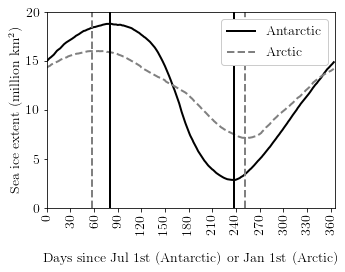

In [13]:
fig = plt.figure(figsize=(5,4))
ax = plt.subplot(1,1,1)
myds = siads.sel(year=slice(sy,ey)).mean(dim='year')
myds = af.switch_sh(myds)
aday, dmin, dmax = af.asym_xr(myds,dim='day')


myds.sie_sh_cdr.plot(ax=ax,linestyle='-',c='k',label='Antarctic',linewidth=2)
myds.sie_nh_cdr.plot(ax=ax,linestyle='--',c='grey',label='Arctic',linewidth=2)

ax.axvline(x=dmin.sie_nh_cdr,linestyle='--',c='grey',alpha=1.,linewidth=2)
ax.axvline(x=dmin.sie_sh_cdr,linestyle='-',c='k',alpha=1.,linewidth=2)
ax.axvline(x=dmax.sie_sh_cdr,linestyle='-',c='k',alpha=1.,linewidth=2)
ax.axvline(x=dmax.sie_nh_cdr,linestyle='--',c='grey',alpha=1.,linewidth=2)

ax.set_ylabel('Sea ice extent (million km$^2$)')
ax.set_xticks(np.arange(1,366,30))
ax.set_xticklabels(np.arange(0,365,30),rotation='vertical')
ax.set_xlabel('Days since Jul 1st (Antarctic) or Jan 1st (Arctic)',labelpad=15)
ax.set_xlim([1,366])
plt.legend(loc = 'upper right',facecolor='white', framealpha=1)
ax.set_ylim([0,20])

plt.tight_layout()
plt.show()
fig.savefig('figs/arcantarc.png',bbox_inches='tight',dpi=300)
plt.close()

Multimodel mean ASYM is 53.35 days with standard deviation of 13.06 days
Obs are 51.00 days


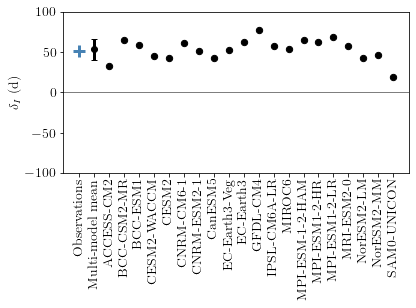

In [14]:
mylabels = np.append(np.asarray(['Observations','Multi-model mean']),asym_cmip6.names.values)
ob_var = 'sie_sh'
cm_var = 'sia_sh'

fig = plt.figure(figsize=(6,4.5))

ax = plt.subplot(1,1,1)
ax.scatter(np.arange(len(asym_cmip6.names.values)),asym_cmip6[cm_var],c='k',marker='o',s=40)
ax.scatter(-2,aday[ob_var+'_cdr'],c='steelblue',marker='+',s=150,linewidth=3)

ax.errorbar(-1,asym_cmip6[cm_var].mean(dim='names'),yerr = asym_cmip6[cm_var].std(dim='names'),
            fmt = 'ok',ecolor='k', elinewidth=3, capsize=3)

print('Multimodel mean ASYM is {:0.2f} days with standard deviation of {:0.2f} days'.format(asym_cmip6[cm_var].mean(dim='names').values,
                                                                                            asym_cmip6[cm_var].std(dim='names').values))
print('Obs are {:0.2f} days'.format(aday[ob_var+'_cdr'].values))

ax.set_xticks(np.arange(-2,len(asym_cmip6.names.values),1))
ax.set_xticklabels(mylabels,rotation='vertical')

ax.set_ylim([-100,100])
ax.set_ylabel('$\delta_I$ (d)')
ax.axhline(y=0.,c='k',linewidth=.5)

plt.tight_layout()
fig.savefig('figs/cmip6_delta_OBsie_CMIPsia.pdf',bbox_inches='tight',dpi=300)
plt.show()

Add the CESM1 large ensemble

In [15]:
lends = xr.open_dataset('processed/sie_sia_daily_LENS_1979-2000.nc')
lends = lends.sel(time=slice('1980',str(ey))).groupby('time.dayofyear').mean(dim='time')
asym_l, _, _ = af.asym_xr(lends,'dayofyear')

sh CMIP6 Multimodel mean ASYM is 53.35 days with standard deviation of 13.06 days
Obs are 51.00 days
nh CMIP6 Multimodel mean ASYM is 8.60 days with standard deviation of 17.83 days
Obs are -25.00 days
sh CMIP5 Multimodel mean ASYM is 44.19 days with standard deviation of 21.80 days
Obs are 51.00 days
nh CMIP5 Multimodel mean ASYM is 6.48 days with standard deviation of 23.16 days
Obs are -25.00 days


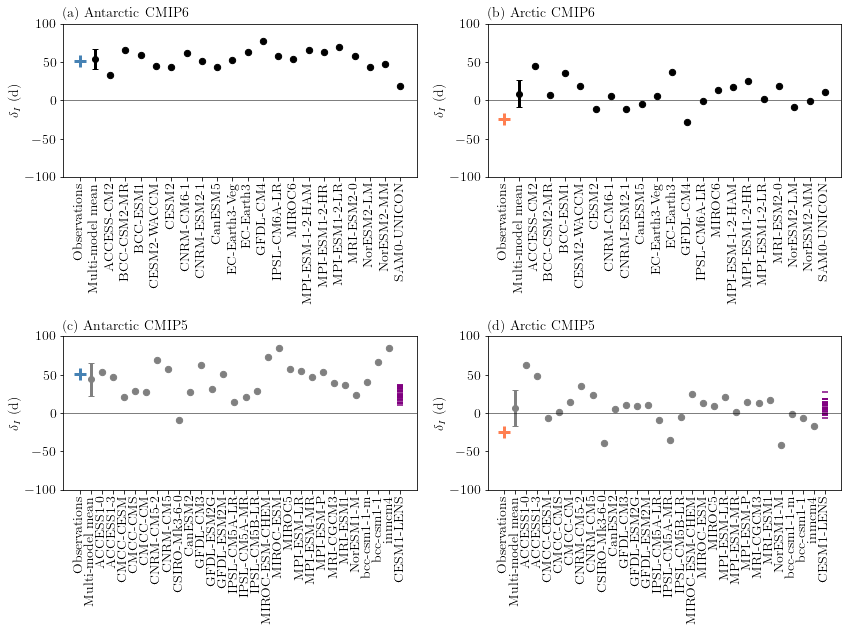

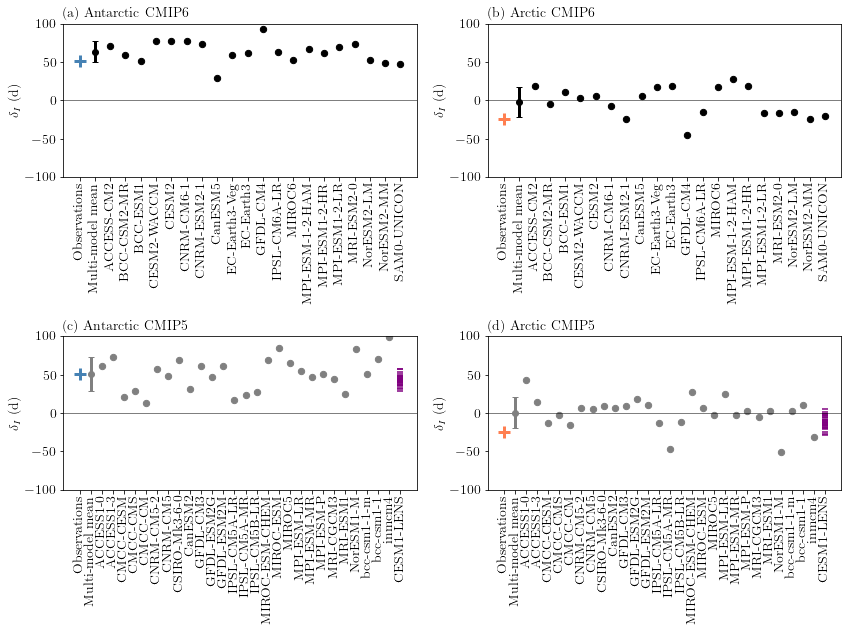

In [16]:
ob_var = 'sie'
for cm_var in ['sia','sie']:

    fig = plt.figure(figsize=(12,9))

    mylabels = np.append(np.asarray(['Observations','Multi-model mean']),asym_cmip6.names.values)
    for h, hemi in enumerate(['sh','nh']):
        ax = plt.subplot(2,2,h+1)
        ax.scatter(np.arange(len(asym_cmip6.names.values)),asym_cmip6[cm_var+'_'+hemi],c='k',marker='o',s=40)
        ax.scatter(-2,aday[ob_var+'_'+hemi+'_cdr'],c=['steelblue','coral'][h],marker='+',s=150,linewidth=3)
        ax.errorbar(-1,asym_cmip6[cm_var+'_'+hemi].mean(dim='names'),yerr = asym_cmip6[cm_var+'_'+hemi].std(dim='names'),
                    fmt = 'o',color='k', elinewidth=3, capsize=3)

        if cm_var=='sia':
            print(hemi+' CMIP6 Multimodel mean ASYM is {:0.2f} days with standard deviation of {:0.2f} days'.format(asym_cmip6[cm_var+'_'+hemi].mean(dim='names').values,
                                                                                                        asym_cmip6[cm_var+'_'+hemi].std(dim='names').values))
            print('Obs are {:0.2f} days'.format(aday[ob_var+'_'+hemi+'_cdr'].values))

        ax.set_xticks(np.arange(-2,len(asym_cmip6.names.values),1))
        ax.set_xticklabels(mylabels,rotation='vertical')
        ax.set_ylim([-100,100])
        ax.set_ylabel('$\delta_I$ (d)')
        ax.axhline(y=0.,c='k',linewidth=.5)
        ax.set_title(['(a) Antarctic','(b) Arctic'][h]+' CMIP6',loc='left',fontsize=14)

    mylabels = np.append(np.asarray(['Observations','Multi-model mean']),asym_cmip5.names.values)
    mylabels = np.append(mylabels,['CESM1-LENS'])
    for h, hemi in enumerate(['sh','nh']):
        ax = plt.subplot(2,2,2+h+1)
        ax.scatter(np.arange(len(asym_cmip5.names.values)),asym_cmip5[cm_var+'_'+hemi],c='grey',marker='o',s=40)
        ax.scatter(-2,aday[ob_var+'_'+hemi+'_cdr'],c=['steelblue','coral'][h],marker='+',s=150,linewidth=3)
        ax.errorbar(-1,asym_cmip5[cm_var+'_'+hemi].mean(dim='names'),yerr = asym_cmip5[cm_var+'_'+hemi].std(dim='names'),
                    fmt = 'o',color='grey', elinewidth=3, capsize=3)

        for e in range(35):
            ax.scatter(len(asym_cmip5.names.values),asym_l[cm_var+'_'+hemi].isel(names=e),c='purple',marker='_')

        if cm_var=='sia':
            print(hemi+' CMIP5 Multimodel mean ASYM is {:0.2f} days with standard deviation of {:0.2f} days'.format(asym_cmip5[cm_var+'_'+hemi].mean(dim='names').values,
                                                                                                        asym_cmip5[cm_var+'_'+hemi].std(dim='names').values))
            print('Obs are {:0.2f} days'.format(aday[ob_var+'_'+hemi+'_cdr'].values))

        ax.set_xticks(np.arange(-2,len(asym_cmip5.names.values)+1,1))
        ax.set_xticklabels(mylabels,rotation='vertical')
        ax.set_ylim([-100,100])
        ax.set_ylabel('$\delta_I$ (d)')
        ax.axhline(y=0.,c='k',linewidth=.5)
        ax.set_title(['(c) Antarctic','(d) Arctic'][h]+' CMIP5',loc='left',fontsize=14)


    plt.tight_layout()
    fig.savefig('figs/cmipasym_OB'+ob_var+'_CMIP'+cm_var+'.pdf',bbox_inches='tight',dpi=300)
    plt.show()

In [17]:
ds = xr.open_dataset('./processed/processed_CMIP3_sia_historical+SRES1AB_r1.nc')
ds = ds.sel(year=slice(str(sy),str(ey)))
ds = ds.rename({'name':'names'})
ds = ds.mean(dim='year')
ds['names'] = ['CMIP3_hist_'+f for f in ds.names.values]
ds = ds.drop('gmst')

shds = ds[['sie_sh','sia_sh']]
nhds = ds[['sie_nh','sia_nh']]
shds = shds.sel(month=[7,8,9,10,11,12,1,2,3,4,5,6])
shds['month'] = np.arange(1,13,1)
ds = xr.merge([nhds,shds])

mmin = ds.argmin(dim='month')
mmax = ds.argmax(dim='month')
asym_cmip3 = (mmin-mmax)

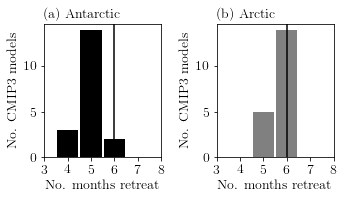

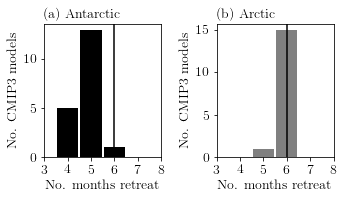

In [18]:
for var in ['sia','sie']:

    fig = plt.figure(figsize=(5,3))
    for h, hemi in enumerate(['sh','nh']):
        ax = fig.add_subplot(1,2,h+1)
        ax.bar(4,np.count_nonzero(asym_cmip3[var+'_'+hemi]==4),width=.9,facecolor=['k','grey'][h])
        ax.bar(5,np.count_nonzero(asym_cmip3[var+'_'+hemi]==5),width=.9,facecolor=['k','grey'][h])
        ax.bar(6,np.count_nonzero(asym_cmip3[var+'_'+hemi]==6),width=.9,facecolor=['k','grey'][h])
        ax.axvline(x=6,c='k')
        ax.set_xticks(np.arange(3,9,1))
        ax.set_xlabel('No. months retreat')
        ax.set_ylabel('No. CMIP3 models')
        ax.set_title(['(a) Antarctic','(b) Arctic'][h],loc='left',fontsize=14)

    plt.tight_layout()
    plt.show()
    fig.savefig('figs/cmip3_'+var+'.pdf',bbox_inches='tight',dpi=500)
    plt.close()


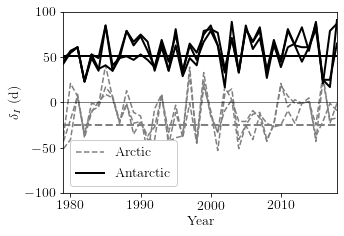

In [19]:
fig = plt.figure(figsize=(5,3.5))
ax = plt.subplot(1,1,1)

for var in asym_y.variables:
    if 'sie' in var:
        slope, intercept, r_value, p_value, std_err = af.linregress(np.arange(40), asym_y[var], dim='year')
        trend = '\n{:0.2f}%/yr'.format(100.*(slope/asym_y[var].mean(dim='year')).values)
        if p_value.values>0.05:
            trend = ''


        if 'nh' in var:
            label = ''
            if 'sie_nh_cdr' in var:
                label = 'Arctic '+trend

            (asym_y[var]).plot(ax=ax,linestyle='--',c='grey',label=label)

        else:
            label = ''
            if 'sie_sh_cdr' in var:
                label = 'Antarctic '+trend
            (asym_y[var]).plot(ax=ax,linestyle='-',c='k',label=label,linewidth=2)
            
ax.legend(facecolor='white', framealpha=1)
ax.axhline(y=0.,c='k',linewidth=.5)
ax.axhline(y=aday.sie_nh_cdr, c='grey', alpha=1. ,linestyle='--',linewidth=2)
ax.axhline(y=aday.sie_sh_cdr, c='k', alpha=1. ,linewidth=2)

ax.set_xlim([1979,2018])
ax.set_xlabel('Year')
ax.set_xticks(np.arange(1980,2020,10))
ax.set_ylim([-100,100])

ax.set_ylabel('$\delta_{I}$ (d)')
plt.tight_layout()
fig.savefig('figs/obsasymtime.pdf',bbox_inches='tight',dpi=300)
plt.show()
plt.close()

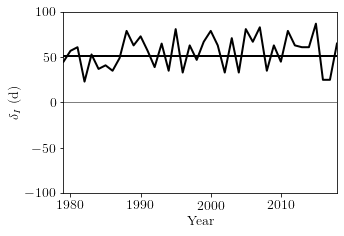

In [38]:
fig = plt.figure(figsize=(5,3.5))
ax = plt.subplot(1,1,1)

var = 'sie_sh_cdr'
(asym_y[var]).plot(ax=ax,linestyle='-',c='k',label=label,linewidth=2)
            

ax.axhline(y=0.,c='k',linewidth=.5)
ax.axhline(y=aday.sie_sh_cdr, c='k', alpha=1. ,linewidth=2)

ax.set_xlim([1979,2018])
ax.set_xlabel('Year')
ax.set_xticks(np.arange(1980,2020,10))
ax.set_ylim([-100,100])

ax.set_ylabel('$\delta_{I}$ (d)')
plt.tight_layout()
fig.savefig('figs/obsasymtime_SHcdronly.pdf',bbox_inches='tight',dpi=300)
plt.show()
plt.close()

In [34]:
print('Standard deviation in annual asym across 1979-1998 is {:.1f} days'.format(asym_y.sie_sh_cdr.sel(year=slice(sy,ey)).std(dim='year').values))

Standard deviation in annual asym across 1979-1998 is 15.7 days


In [35]:
print('Standard deviation in annual asym across 19792018 is {:.1f} days'.format(asym_y.sie_sh_cdr.std(dim='year').values))

Standard deviation in annual asym across 19792018 is 18.0 days
